In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'google.colab'

In [3]:
img = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/Lenna.png", cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist = hist.ravel() / hist.max()
x= np.arange(256)

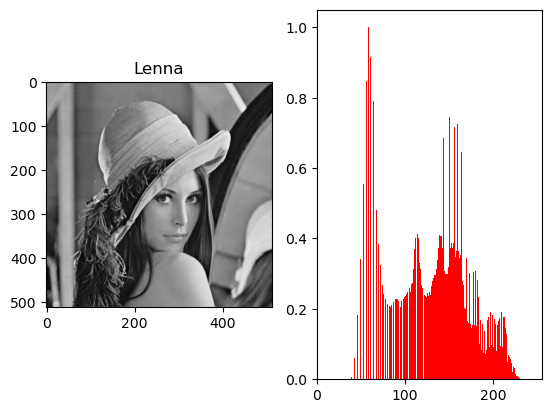

In [4]:
plt.subplot(121), plt.imshow(img, 'gray'), plt.title("Lenna")
plt.subplot(122), plt.bar(x, hist, width=1, color='r'), plt.xlim([0, 256])
plt.show()

In [16]:
img1 = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/Lenna.png", cv2.IMREAD_COLOR)
img2 = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/img4.jpg", cv2.IMREAD_COLOR)
img2 = cv2.resize(img2, dsize=(512, 512))
add_image = cv2.add(img1, img2)

cv2.imshow('dst', add_image)
#plt.imshow(add_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
img = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/Lenna.png", cv2.IMREAD_COLOR)
logo = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/Symbol.jpg", cv2.IMREAD_COLOR)
#logo 사이즈 정하기 256*256 3 channel
logo = cv2.resize(logo, dsize=(256, 256))
#img 속성
rows, cols, _ = logo.shape
#삽입할 이미지 위치
roi = img[0:rows, 0:cols]
cv2.imshow("roi", roi)
#greyscale 이미지로 바꾸기
logo2gray =cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
#특정 범위의 값을 바이너리 형태로 바꿔줌
#ret = error 발생 시 체크 가능
ret, mask = cv2.threshold(logo2gray, 200, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img_bg = cv2.bitwise_and(roi, roi, mask=mask)
cv2.imshow("img_bg",img_bg)
logo_fg = cv2.bitwise_and(logo, logo, mask=mask_inv)

dst = cv2.add(img_bg, logo_fg)
img[0:rows, 0:cols] =dst

cv2.imshow('output',img)
#plt.imshow(add_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
def MyKernelConv3x3(arr, kernel, y, x, height, width):
    sum, sumKernel =0, 0
    for i in range(-1, 2):
        for j in range(-1, 2):
            if((y+ i) >= 0 and (y +i) < height and (x + j) >= 0 and (x + j) < width):
                sum += arr[y+i, x+j] * kernel[i+1, j+1]
                sumKernel += kernel[i+1, j+1]

    if sumKernel != 0:
        return sum / sumKernel
    else:
        return sum           

In [30]:
img = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/Lenna.png", cv2.IMREAD_COLOR)
output = np.zeros_like(img)

h, w, _ = img.shape

kernel = np.array([[1,2,1], [2, 4, 2], [1, 2, 1]], dtype=np.float32)

for i in range(h):
    for j in range(w):
        
        output[i, j] = MyKernelConv3x3(img, kernel, i, j, h, w)

output = output.astype(np.uint8)
cv2.imshow('output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [31]:
img = cv2.imread("C:/Users/CHR/Documents/GitHub/TEST/ESD/week4/image/gear.jpg", cv2.IMREAD_GRAYSCALE)
outputX = np.zeros_like(img)
outputY = np.zeros_like(img)
h, w = img.shape

kernelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
kernelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

for i in range(h):
    for j in range(w):
        outputX[i, j] = abs(MyKernelConv3x3(img, kernelX, i, j, h, w))
        outputY[i, j] = abs(MyKernelConv3x3(img, kernelY, i, j, h, w))

cv2.imshow("outputX", outputX.astype(np.uint8))
cv2.imshow("outputY", outputY.astype(np.uint8))
output = (outputX + outputY) / 2
cv2.imshow("output", output.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()